# Time Series

In [2]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools

In [3]:
from datetime import datetime
now = datetime.now()
now
now.year, now.month, now.day

(2021, 1, 5)

In [3]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2021, 1, 6, 18, 7, 8, 526288)

In [4]:
now.year, now.month, now.day

(2021, 1, 6)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

56700

In [6]:
delta = datetime(2011, 1, 8) - datetime(1008, 6 ,29, 6, 11)
delta

datetime.timedelta(days=366165, seconds=64140)

In [7]:
delta.days

366165

In [8]:
delta.seconds

64140

In [4]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [10]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)


datetime.datetime(2011, 1, 19, 0, 0)

In [11]:
start - 2 * timedelta(12)


datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [ ]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')

In [12]:
#datetime object to string using strftime()
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [ ]:
# string to datetime object using strptime()
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

In [13]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')


datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [ ]:
from dateutil.parser import parse
parse('2011-01-03')

In [15]:
# easier parsing method. No need to specify datetime formats each time a string date arises
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [17]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [18]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [19]:
idx = pd.to_datetime(datestrs + [None])
idx


DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [20]:
idx[2]
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [ ]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

In [ ]:
ts.index

In [ ]:
ts + ts[::2]

In [ ]:
ts.index.dtype

In [ ]:
stamp = ts.index[0]
stamp

### Indexing, Selection, Subsetting

In [ ]:
stamp = ts.index[2]
ts[stamp]

In [ ]:
ts['1/10/2011']
ts['20110110']

In [ ]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001']

In [ ]:
longer_ts['2001-05']

In [ ]:
ts[datetime(2011, 1, 7):]

In [ ]:
ts
ts['1/6/2011':'1/11/2011']

In [ ]:
ts.truncate(after='1/9/2011')

In [ ]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

### Time Series with Duplicate Indices

In [ ]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

In [ ]:
dup_ts.index.is_unique

In [ ]:
dup_ts['1/3/2000']  # not duplicated
dup_ts['1/2/2000']  # duplicated

In [ ]:
grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

## Date Ranges, Frequencies, and Shifting

In [ ]:
ts
resampler = ts.resample('D')

### Generating Date Ranges

In [ ]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

In [ ]:
pd.date_range(start='2012-04-01', periods=20)
pd.date_range(end='2012-06-01', periods=20)

In [ ]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

In [ ]:
pd.date_range('2012-05-02 12:56:31', periods=5)

In [ ]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

### Frequencies and Date Offsets

In [ ]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

In [ ]:
four_hours = Hour(4)
four_hours

In [ ]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

In [ ]:
Hour(2) + Minute(30)

In [ ]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

#### Week of month dates

In [ ]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

### Shifting (Leading and Lagging) Data

In [ ]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts
ts.shift(2)
ts.shift(-2)

ts / ts.shift(1) - 1

In [ ]:
ts.shift(2, freq='M')

In [ ]:
ts.shift(3, freq='D')
ts.shift(1, freq='90T')

#### Shifting dates with offsets

In [ ]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

In [ ]:
now + MonthEnd()
now + MonthEnd(2)

In [ ]:
offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

In [ ]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts
ts.groupby(offset.rollforward).mean()

In [ ]:
ts.resample('M').mean()

## Time Zone Handling

In [27]:
import pytz
pytz.common_timezones[+15:]

['Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Windhoek',
 'America/Adak',
 'America/Anchorage',
 'America/Anguilla',
 'America/Antigua',
 'America/Araguaina',
 'America/Argentina/Buenos_Aires',
 'America/Argentina/Catamarca',
 'America/Argentina/Cordoba',
 'America/Argentina/Jujuy',
 'America/Argentina/La_Rioja',
 'America/Argentina/M

In [28]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [29]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.204708
2012-03-10 09:30:00    0.478943
2012-03-11 09:30:00   -0.519439
2012-03-12 09:30:00   -0.555730
2012-03-13 09:30:00    1.965781
2012-03-14 09:30:00    1.393406
Freq: D, dtype: float64

In [30]:
print(ts.index.tz)

None


In [31]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [32]:
ts
ts_utc = ts.tz_localize('UTC')
ts_utc
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [33]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.204708
2012-03-10 04:30:00-05:00    0.478943
2012-03-11 05:30:00-04:00   -0.519439
2012-03-12 05:30:00-04:00   -0.555730
2012-03-13 05:30:00-04:00    1.965781
2012-03-14 05:30:00-04:00    1.393406
Freq: D, dtype: float64

In [ ]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')
ts_eastern.tz_convert('Europe/Berlin')

In [ ]:
ts.index.tz_localize('Asia/Shanghai')

### Operations with Time Zone−Aware Timestamp Objects

In [ ]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

In [ ]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

In [ ]:
stamp_utc.value
stamp_utc.tz_convert('America/New_York').value

In [ ]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

In [ ]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

### Operations Between Different Time Zones

In [ ]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

## Periods and Period Arithmetic

In [ ]:
p = pd.Period(2007, freq='A-DEC')
p

In [38]:
p = pd.Period(2007, freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [39]:
p + 5
p - 2

Period('2005', 'A-DEC')

In [ ]:
pd.Period('2014', freq='A-DEC') - p

In [40]:
pd.Period('2014', freq='A-Dec') - p


<7 * YearEnds: month=12>

In [ ]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

In [42]:
#Frew defines the units within the range, M-month and D-day for example.
rng = pd.period_range('2000-01-01', '2000-06-30', freq='D')
rng

PeriodIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
             '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
             '2000-01-09', '2000-01-10',
             ...
             '2000-06-21', '2000-06-22', '2000-06-23', '2000-06-24',
             '2000-06-25', '2000-06-26', '2000-06-27', '2000-06-28',
             '2000-06-29', '2000-06-30'],
            dtype='period[D]', length=182, freq='D')

In [44]:
pd.Series(np.random.randn(6), index=rng)

ValueError: Length of passed values is 6, index implies 182.

In [43]:
pd.Series(np.random.randn(6), index = rng)

ValueError: Length of passed values is 6, index implies 182.

In [45]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [ ]:
p = pd.Period('2007', freq='A-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

In [47]:
p = pd.Period('2007', freq = 'A-DEC')
p

Period('2007', 'A-DEC')

In [48]:
p.asfreq('M', how = 'start')
p

Period('2007', 'A-DEC')

In [49]:
p = pd.Period('2007', freq='A-JUN')
p
p.asfreq('M', 'start')
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [50]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [51]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts.asfreq('M', how='start')

2006-01    1.669025
2007-01   -0.438570
2008-01   -0.539741
2009-01    0.476985
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how='end')

### Quarterly Period Frequencies

In [52]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [53]:
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [54]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [55]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts


2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [56]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)

In [ ]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts
pts = ts.to_period()
pts

In [ ]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2
ts2.to_period('M')

In [ ]:
pts = ts2.to_period()
pts
pts.to_timestamp(how='end')

### Creating a PeriodIndex from Arrays

In [ ]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)
data.year
data.quarter

In [ ]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index
data.index = index
data.infl

## Resampling and Frequency Conversion

In [57]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts


2000-01-01    3.248944
2000-01-02   -1.021228
2000-01-03   -0.577087
2000-01-04    0.124121
2000-01-05    0.302614
                ...   
2000-04-05   -0.193401
2000-04-06    0.669158
2000-04-07   -1.648985
2000-04-08   -2.252797
2000-04-09   -1.166832
Freq: D, Length: 100, dtype: float64

In [58]:
ts.resample('M').mean()
ts.resample('M', kind='period').mean()

2000-01   -0.273862
2000-02   -0.146345
2000-03    0.329562
2000-04   -0.818551
Freq: M, dtype: float64

### Downsampling

In [59]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [60]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [61]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [62]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [63]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

<ipython-input-63-b63ded3800c4>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right',


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### Open-High-Low-Close (OHLC) resampling

In [64]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [ ]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

In [ ]:
df_daily = frame.resample('D').asfreq()
df_daily

In [ ]:
frame.resample('D').ffill()

In [ ]:
frame.resample('D').ffill(limit=2)

In [ ]:
frame.resample('W-THU').ffill()

### Resampling with Periods

In [65]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.119683,0.073403,0.195746,0.282886
2001,-0.015411,0.096375,-0.188421,-0.160739


In [66]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.119683,0.073403,0.195746,0.282886
2001Q1,-0.119683,0.073403,0.195746,0.282886
2001Q2,-0.119683,0.073403,0.195746,0.282886
2001Q3,-0.119683,0.073403,0.195746,0.282886
2001Q4,-0.015411,0.096375,-0.188421,-0.160739


In [67]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.119683,0.073403,0.195746,0.282886
2001Q1,-0.119683,0.073403,0.195746,0.282886
2001Q2,-0.119683,0.073403,0.195746,0.282886
2001Q3,-0.119683,0.073403,0.195746,0.282886
2001Q4,-0.015411,0.096375,-0.188421,-0.160739
2002Q1,-0.015411,0.096375,-0.188421,-0.160739
2002Q2,-0.015411,0.096375,-0.188421,-0.160739
2002Q3,-0.015411,0.096375,-0.188421,-0.160739


## Moving Window Functions

In [68]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

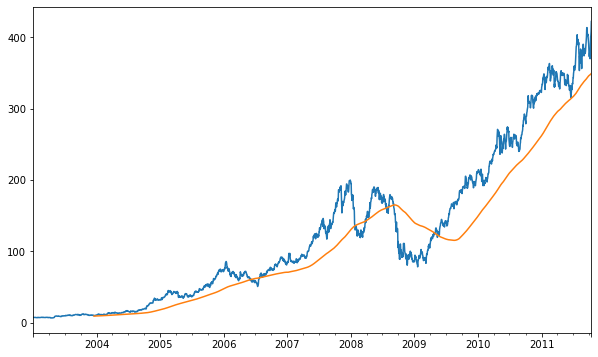

In [69]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [70]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

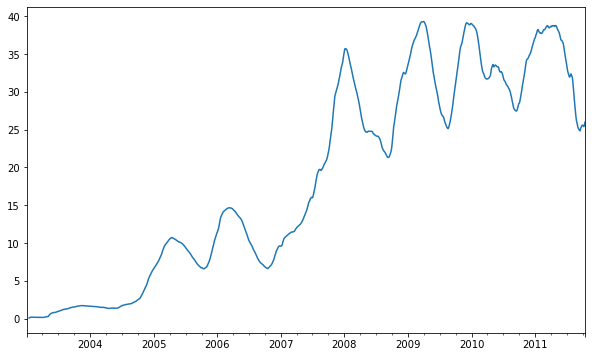

In [71]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
appl_std250.plot()

In [72]:
expanding_mean = appl_std250.expanding().mean()

In [73]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<AxesSubplot:>

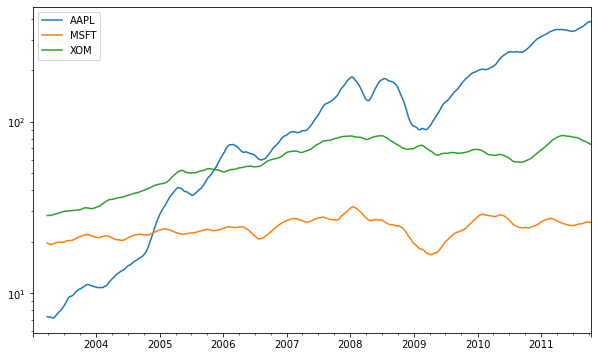

In [74]:
close_px.rolling(60).mean().plot(logy=True)

In [75]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### Exponentially Weighted Functions

In [ ]:
plt.figure()

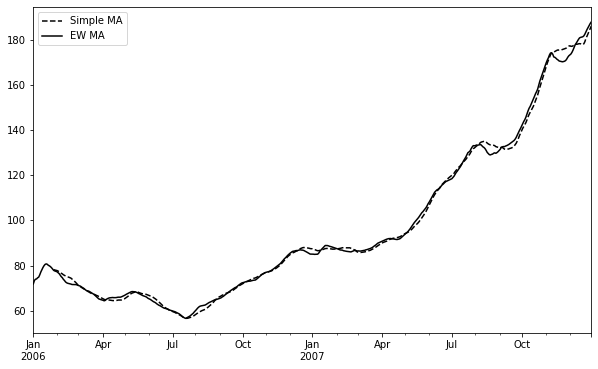

In [76]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [ ]:
plt.figure()

In [77]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<AxesSubplot:>

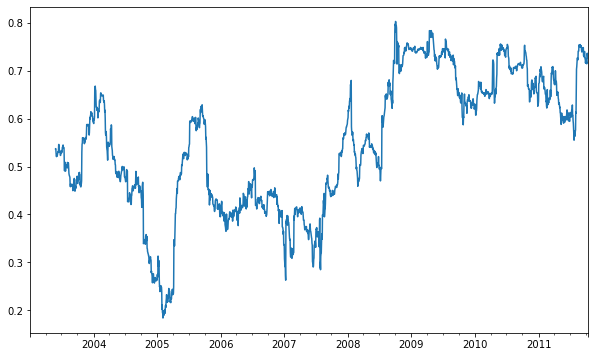

In [78]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [ ]:
plt.figure()

In [ ]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

In [ ]:
plt.figure()

<AxesSubplot:>

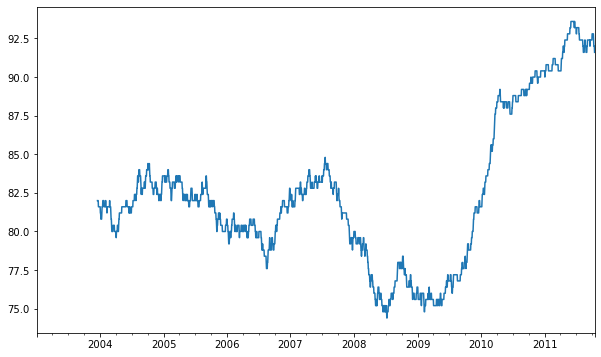

In [79]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion